<a href="https://colab.research.google.com/github/GabrielBatavia/Learn_TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

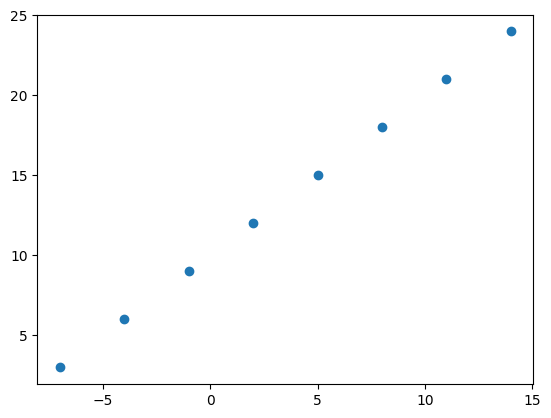

In [3]:
# Creating features

x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(x, y);

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
x[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
x[0].ndim

0

In [9]:
# Turn our Numpy arrays into tensors with dtype 32

X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), ())

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function wich tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)

3. Fitting a model - letting the model try to find patters between X & y (features and labels)

In [11]:
# Opetionally, the first layer can receive an 'input_shape' argument :
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# Afterwards, we do automatic shape inference :
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# ...

In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 777ms/step - loss: 19.9077 - mae: 19.9077
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 19.6265 - mae: 19.6265
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 19.3452 - mae: 19.3452
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 19.0640 - mae: 19.0640
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 18.7827 - mae: 18.7827


In [13]:
# Check our X and Y
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [14]:
# Try make prediction
model.predict([17.0])

1/1 [==============================] - 0s 189ms/step


array([[-18.677422]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increse the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might chang ethe optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn form)

In [15]:
# Let's rebuild our model

# 1. Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model1.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 680ms/step - loss: 16.8930 - mae: 16.8930
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 16.6118 - mae: 16.6118
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 16.3305 - mae: 16.3305
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 16.0493 - mae: 16.0493
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 15.7680 - mae: 15.7680
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 15.4868 - mae: 15.4868
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 15.2055 - mae: 15.2055
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.9243 - mae: 14.9243
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.7320 - mae: 14.7320
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5995 - mae: 14.5995
Epoch 11/100
1/1 [==============================

In [16]:
# Try make prediction
model1.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[29.726944]], dtype=float32)

In [17]:
# re-write the model by my self and improve one thing to get better

# 1. Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # chang the optimizers from SGD to adam
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 902ms/step - loss: 14.5743 - mae: 14.5743
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5698 - mae: 14.5698
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.5653 - mae: 14.5653
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 14.5608 - mae: 14.5608
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 14.5563 - mae: 14.5563
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 14.5518 - mae: 14.5518
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 14.5473 - mae: 14.5473
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 14.5428 - mae: 14.5428
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 14.5383 - mae: 14.5383
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 14.5338 - mae: 14.5338
Epoch 11/100
1/1 [==============================

In [18]:
# Try make prediction
model2.predict([17.0])

1/1 [==============================] - 0s 230ms/step


array([[-3.4181113]], dtype=float32)

In [19]:
# re-write the model

# 1. Create the model (with 100 hidden units )
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # BREAK IN UPDATED TENSOR VERSION
model3.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3066 - mae: 13.3066
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.6272 - mae: 12.6272
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9382 - mae: 11.9382
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 11.2388 - mae: 11.2388
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5279 - mae: 10.5279
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8042 - mae: 9.8042
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0663 - mae: 9.0663
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3126 - mae: 8.3126
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 7.5410 - mae: 7.5410
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 6.7988 - mae: 6.7988
Epoch 11/100
1/1 [==============================] - 0s 31ms/s

In [20]:
# Try make prediction
model3.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[26.67374]], dtype=float32)

## Evaluating Model

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

Evaluation = visualize

it's good idea to visualize :
* The data - what data we working with? what does it look like?
* The model = what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the origin label)

In [21]:
# Make a bigger dataset

x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset

y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

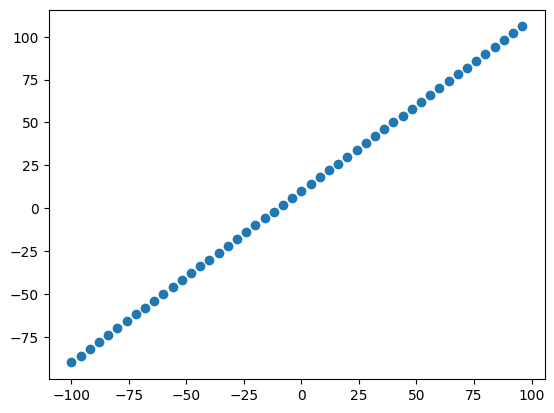

In [23]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets

* **Training set** - the model learn from this data, 70-80%
* **Validation set** - set model gets tuned on this data, 10-15%
* **Test set** - the model gets evaluated on this data, 10-15%

In [24]:
# Check the length of the data
len(x)

50

In [25]:
# Split the data into train and test sets
x_train = x[:40] # first to 40 data will be the training sample
y_train = y[:40]

x_test = x[40:] # 20% will be test
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got out data in training and test sets...lets visualize it

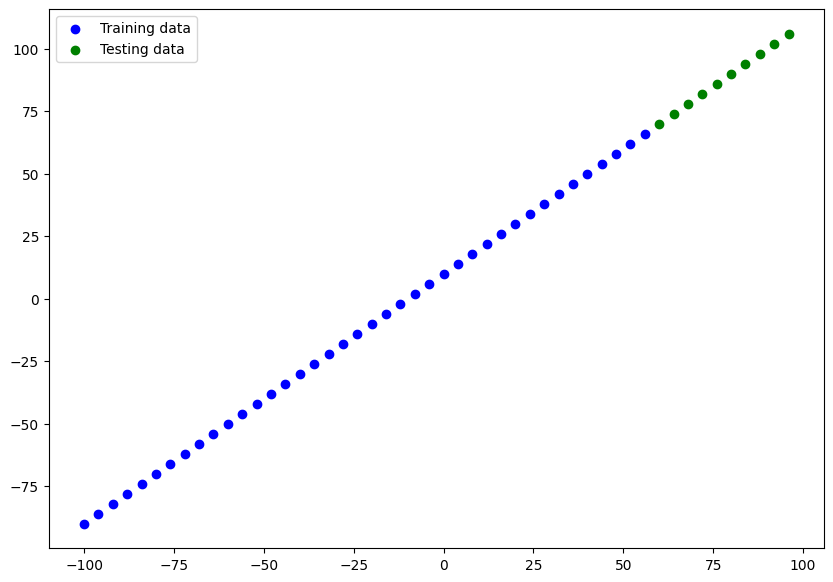

In [26]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

In [27]:
# Lets have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [28]:
# Lets create  model wich builds automatically by defining the input_shape arguments

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_one")

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [29]:
model_1.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters that we have

* Trainable parameters - the parameters (patterns) the model can update as it trains

* Non-trainable params - parameters cant updated during training (allready learn in models during **transfer learning**)

📚 **Resource** : For a more in depth overview of the trainable parameters within a layer, check ouy MIT's intorduction to deep learning video

⚡**Exercise :** Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [30]:
# 3. Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=60, verbose=0)

In [31]:
# Get a summary of our model
model_1.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


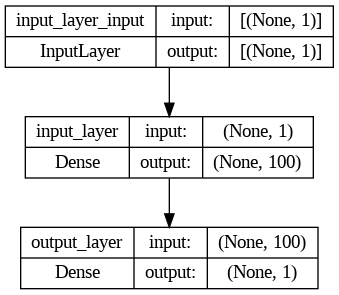

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred' (ground truth versus your model prediction)

In [33]:
# Make some predictions

y_pred = model_1.predict(x_test)
y_pred

1/1 [==============================] - 0s 171ms/step


array([[ 73.6277 ],
       [ 78.46896],
       [ 83.31023],
       [ 88.15149],
       [ 92.99276],
       [ 97.83404],
       [102.67529],
       [107.51658],
       [112.35784],
       [117.1991 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note : ** if you feel like you're going to reuse some functionality in the future, its good idea to turn it into a fucntion

In [35]:
# Lets create a plotting function

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")

  # Plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()



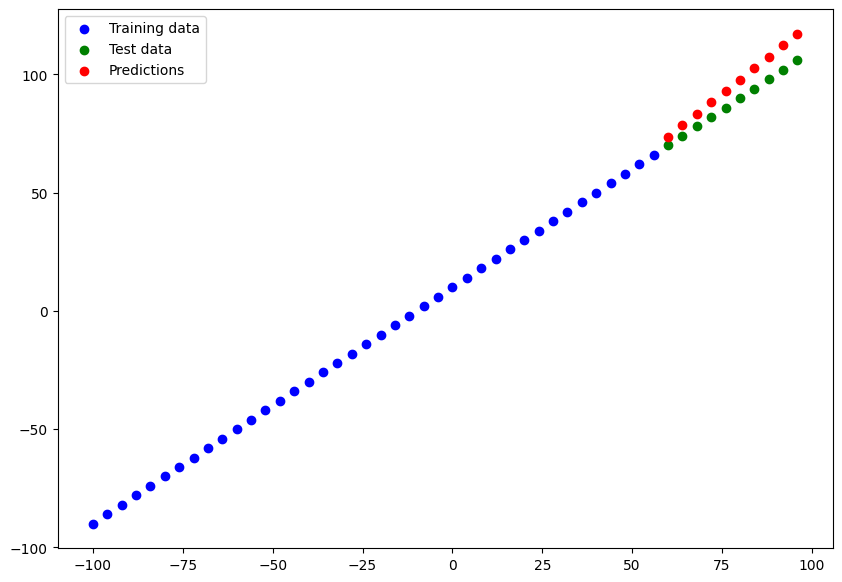

In [36]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

The evaluation metrics is depending to the model we working on

since we're working on a regression, two of the main matrics:
* MAE - mean absolute error, "on average, how wrong is each of my model predictions"

* MSE - mean square error, "square the average errors"

In [37]:
 # Evaluate the model on the test
 model_1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 356ms/step - loss: 7.4134 - mae: 7.4134


[7.413393497467041, 7.413393497467041]

In [38]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.097839, 12.212415, 10.537954, 10.      , 10.598552, 12.333615,
       15.340235, 19.516579, 24.357841, 29.199097], dtype=float32)>

In [39]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 73.6277 ],
       [ 78.46896],
       [ 83.31023],
       [ 88.15149],
       [ 92.99276],
       [ 97.83404],
       [102.67529],
       [107.51658],
       [112.35784],
       [117.1991 ]], dtype=float32)>

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 73.6277 ,  78.46896,  83.31023,  88.15149,  92.99276,  97.83404,
       102.67529, 107.51658, 112.35784, 117.1991 ], dtype=float32)>

In [42]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.4133987>

In [43]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=60.797264>

In [44]:
# Make fucntion to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                      y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more example for model

2. Make your model larger (using a more complex model) - matbe more layers or hidden units

3. Train for longer - give model more chance to find patterns in data

Let's do 3 modelling experiment L

1. 'model_1' - same as the origin, 1 layer, trained for 100 epochs

2. 'model_2' - 2 layers, trained for 100 epochs

3. 'model_3' - 2 layers, rained for 500 epochs

In [45]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [46]:
# First build model_1

# Ser random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"],
                run_eagerly=True)

# 3. FIt the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [47]:
model_1.predict(tf.reshape(x_test, shape=(-1,1)))

1/1 [==============================] - 0s 53ms/step


array([[44.430534],
       [47.30607 ],
       [50.181602],
       [53.05714 ],
       [55.932674],
       [58.808212],
       [61.683746],
       [64.55928 ],
       [67.434814],
       [70.31035 ]], dtype=float32)

1/1 [==============================] - 0s 21ms/step


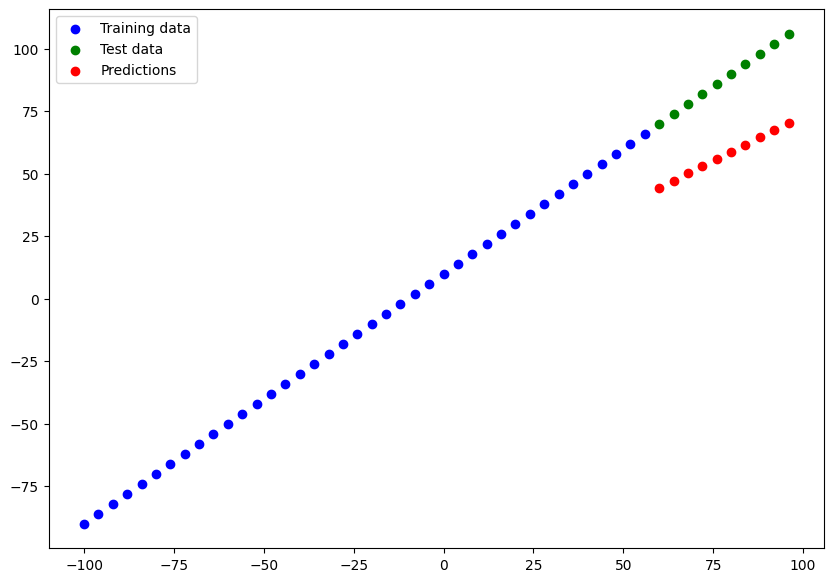

In [48]:
# Make a plot predictions for model_1

# x_test = tf.reshape(x_test, shape=(-1,1))

y_preds_1 = model_1.predict(tf.reshape(x_test, shape=(-1,1)))
plot_predictions(predictions=y_preds_1)

In [49]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.629559>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.6014>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [50]:
# Build model_2

# Set the random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(70, name="input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
])

# 2. Compile the model

model_2.compile(loss = mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [51]:
# 3. Make Train the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=54)

Epoch 1/54
2/2 [==============================] - 1s 19ms/step - loss: 40.7317 - mae: 37.0417
Epoch 2/54
2/2 [==============================] - 0s 27ms/step - loss: 40.7844 - mae: 41.7541
Epoch 3/54
2/2 [==============================] - 0s 9ms/step - loss: 56.4396 - mae: 21.8353
Epoch 4/54
2/2 [==============================] - 0s 14ms/step - loss: 40.6819 - mae: 36.3312
Epoch 5/54
2/2 [==============================] - 0s 13ms/step - loss: 40.7233 - mae: 38.3434
Epoch 6/54
2/2 [==============================] - 0s 12ms/step - loss: 40.8466 - mae: 33.2012
Epoch 7/54
2/2 [==============================] - 0s 8ms/step - loss: 40.7413 - mae: 38.8961
Epoch 8/54
2/2 [==============================] - 0s 8ms/step - loss: 40.9732 - mae: 31.8770
Epoch 9/54
2/2 [==============================] - 0s 11ms/step - loss: 47.6816 - mae: 15.4880
Epoch 10/54
2/2 [==============================] - 0s 15ms/step - loss: 41.0369 - mae: 38.7048
Epoch 11/54
2/2 [==============================] - 0s 26ms/ste

In [52]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [54]:
model_2.predict(x_test)

1/1 [==============================] - 0s 60ms/step


array([[32.840492],
       [35.044445],
       [37.24839 ],
       [39.452343],
       [41.656296],
       [43.860245],
       [46.064194],
       [48.268143],
       [50.47209 ],
       [52.676044]], dtype=float32)

1/1 [==============================] - 0s 30ms/step


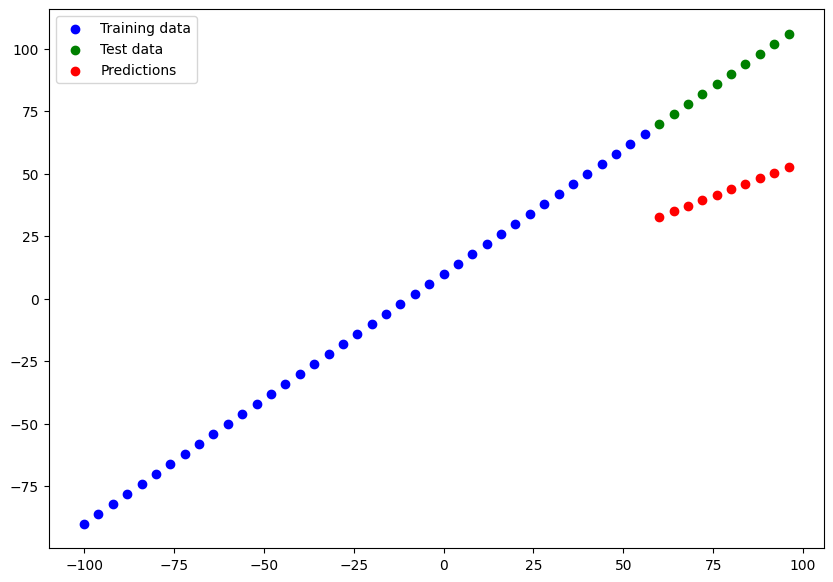

In [55]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [56]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 70)                140       
                                                                 
 Output_layer (Dense)        (None, 1)                 71        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=45.24173>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2073.427>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [58]:
# Build mdoel 3

# set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

In [59]:
# 3. FIt the model
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 41.7482 - mae: 45.5992
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 40.7969 - mae: 40.1292
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 49.1605 - mae: 14.4086
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 40.9280 - mae: 39.8582
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 40.6350 - mae: 37.9633
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 40.8681 - mae: 32.8028
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 40.7483 - mae: 37.7330
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 40.6645 - mae: 33.1314
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 43.0570 - mae: 20.6518
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 40.3341 - mae: 33.8210
Epoch 11/500
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 147ms/step


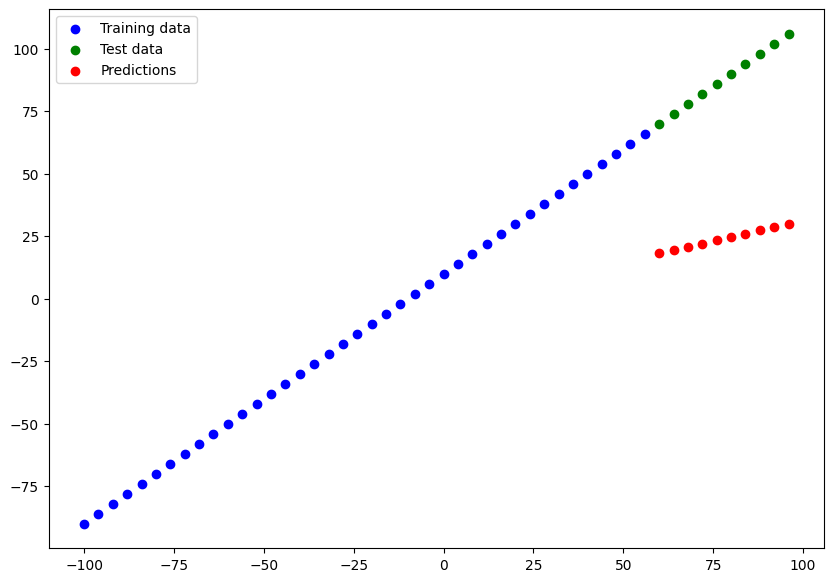

In [60]:
# Make and plot some predictions

y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions = y_preds_3)

In [61]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=63.951622>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4149.7026>)

## Comparing the results of out experiments



In [62]:
# Lets compare our models result using a pandas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,30.629559,948.601379
1,model_2,45.241730,2073.427002
2,model_3,63.951622,"tf.Tensor(4149.7026, shape=(), dtype=float32)"


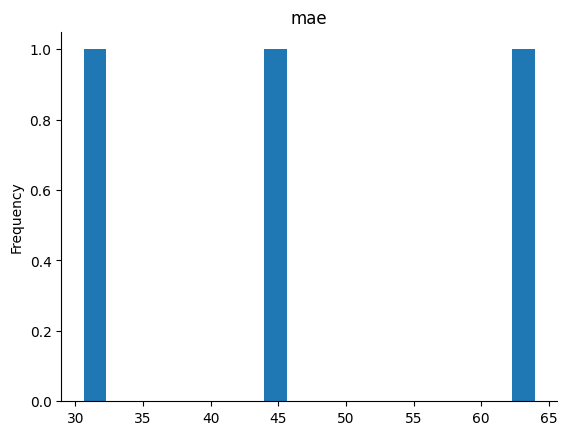

In [63]:
# @title mae
# Got Recommendation from gcollab

from matplotlib import pyplot as plt
all_results['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

🔑**Note :** One of our main goals should be to minimize the time between our experiments. We must try and error

## Tracking your experiments

One really good habit in ml modelling is to track the result of your experiments.

Luckly, there are tools to help us!

📖**Resource:** As we build more models, we will want to look into using :

* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments



## Saving Our model

Saving our model allows us to use them outside of Google collab

There are two main formats we can save our model too :
1. The SavedModel format
2. The HDF5 format

In [64]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")